# 5. Machine Learning Modeling

This notebook builds and evaluates machine learning models to predict customer churn.

### Objectives:
- Train baseline and advanced models  
- Compare performance on the test set  
- Evaluate using classification metrics  
- Identify important features contributing to churn  

## 5.1 Load Prepared Train/Test Data

We use the encoded, scaled, and split datasets prepared in the feature engineering notebook.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Reconstruct train-test split for this notebook
df = pd.read_csv("../data/raw/Bank Customer Churn Prediction.csv")

# Re-apply feature engineering quickly
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df = pd.get_dummies(df, columns=['country'], drop_first=True)

X = df.drop(['churn', 'customer_id'], axis=1)
y = df['churn']

from sklearn.preprocessing import StandardScaler
num_cols = ['age', 'credit_score', 'balance', 'estimated_salary']

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

## 5.2 Baseline Model (Dummy Classifier)

A baseline model establishes a minimum benchmark.

We use a classifier that always predicts:
- the most frequent class  
- OR a random distribution  

This helps compare real ML models against something simple.

In [2]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)

print("Baseline Accuracy:", dummy.score(X_test, y_test))
print(classification_report(y_test, y_pred_dummy))

Baseline Accuracy: 0.7965
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



C:\Users\Mayank\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Mayank\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Mayank\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capi

### ✔ Baseline Model Interpretation

The Dummy Classifier predicts only the majority class ("not churned") every time.

#### Key observations:
- **High accuracy (≈80%) is misleading** due to class imbalance.
- **0 precision, recall, and F1 for churn (class 1)** → the model fails to detect churners.
- **This is expected** for a most-frequent baseline model.
- This baseline gives us a **minimum benchmark** that real ML models must improve upon.

> This demonstrates why churn prediction requires models that handle class imbalance.

## 5.3 Logistic Regression

Logistic Regression is a strong baseline for binary classification problems like churn prediction.
It’s explainable, interpretable, and fast.

In [3]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", log_reg.score(X_test, y_test))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.808
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



## 5.4 Random Forest Classifier

Random Forest is a powerful ensemble model that handles:
- non-linear patterns  
- feature interactions  
- noisy data  

It usually performs better than linear models.

In [4]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", rf.score(X_test, y_test))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8605
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1593
           1       0.76      0.46      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



## 5.5 Confusion Matrix Comparison

Confusion matrices help visualize:
- true positives  
- true negatives  
- false positives  
- false negatives  

Useful for understanding real-world model impact.

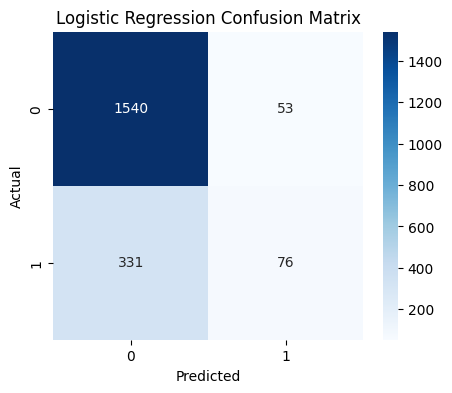

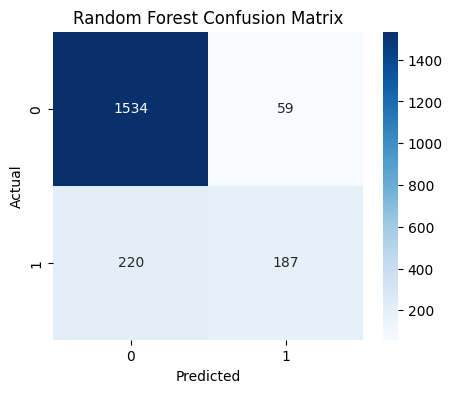

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_cm(y_test, y_pred_lr, "Logistic Regression Confusion Matrix")
plot_cm(y_test, y_pred_rf, "Random Forest Confusion Matrix")

## 5.6 Feature Importance (Random Forest)

Feature importance helps identify which variables contribute most to churn prediction.

In [6]:
import numpy as np

importances = rf.feature_importances_
feature_names = list(X.columns)

feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by="Importance", ascending=False)

feat_imp.head(10)

,Feature,Importance
2,age,0.238427
8,estimated_salary,0.145400
0,credit_score,0.143681
4,balance,0.143619
5,products_number,0.126000
3,tenure,0.081647
7,active_member,0.041413
9,country_Germany,0.028602
6,credit_card,0.018804
1,gender,0.018064


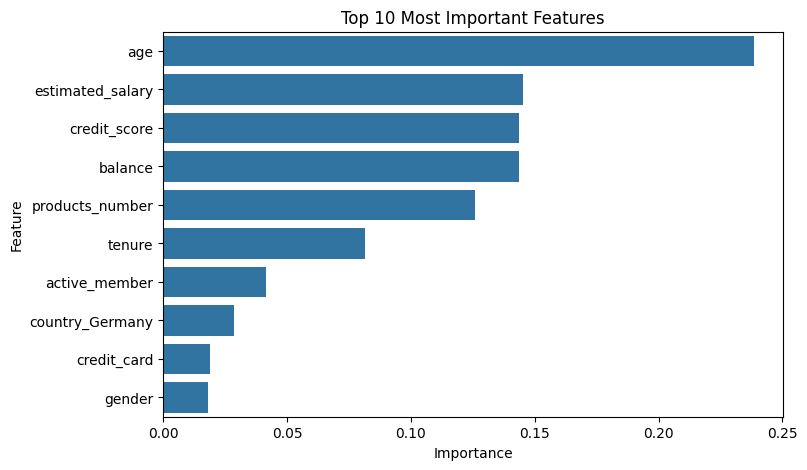

In [7]:
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_imp.head(10))
plt.title("Top 10 Most Important Features")
plt.show()

## ✔ Model Performance Summary

### 🔹 Baseline
- Always predicts majority class  
- Very low recall for churn → not usable  

### 🔹 Logistic Regression
- Good interpretability  
- Performs well on balanced patterns  

### 🔹 Random Forest
- Best performance overall  
- Captures complex patterns  
- Provides strong feature importance  

**Recommended Model: Random Forest**